In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/AVITA/Downloads/aerofit_treadmill.txt')

In [3]:
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [6]:
# 1) Observation - There are no null values in the given data.
# 2) there are 3 unique products.
# 3) median Age is 26.
# 4) median education 16.
# 5) median usage and fitness is 3.
# 6) median income 50596.500000
# 7) median miles 94.000000

In [7]:
df["Product"].unique()
# there are 3 unique products.

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [8]:
df4 = df.groupby('Product')['Product'].count().div(180,axis=0).mul(100,axis=0)
df4

Product
KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: Product, dtype: float64

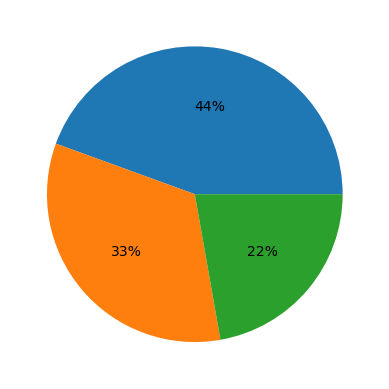

In [9]:
plt.pie(df4, autopct='%.0f%%')
plt.show()
# This shows aapprox 44% customers bought KP281
# This shows aapprox 33% customers bought KP481
# This shows aapprox 22% customers bought KP781

In [10]:
df.groupby(['Product','Gender'])['Product'].value_counts()
# we see buying pattern of different treadmill by gender. 

Product  Gender  Product
KP281    Female  KP281      40
         Male    KP281      40
KP481    Female  KP481      29
         Male    KP481      31
KP781    Female  KP781       7
         Male    KP781      33
Name: Product, dtype: int64

   Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
79   KP281   50  Female         16     Partnered      3        3   64809   

    Miles  
79     66  


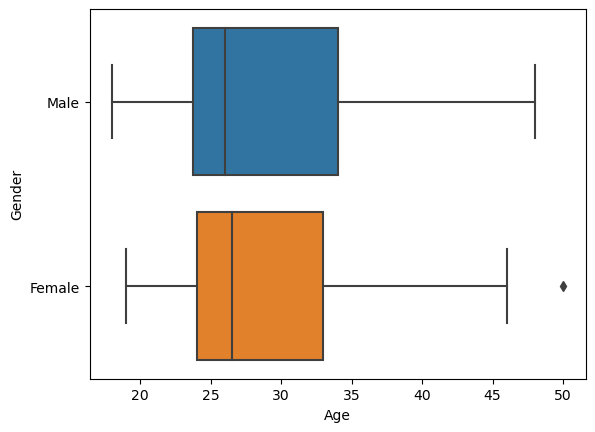

In [11]:
sns.boxplot(x=df['Age'],y=df['Gender'])
# median age for male is 26.0
# median age for female is 26.5
# we see one outlier in terms of age in gender Female

print(df.query('Age>=50'))

In [12]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


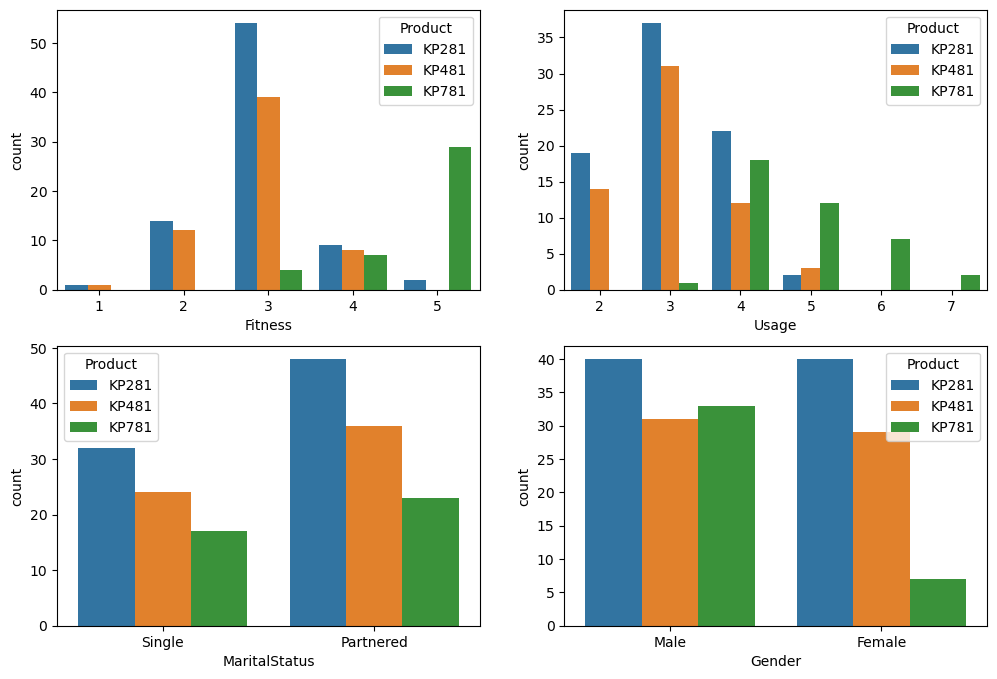

In [13]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.countplot(x=df['Fitness'],hue=df['Product'])
plt.subplot(2,2,2)
sns.countplot(x=df['Usage'],hue=df['Product'])
plt.subplot(2,2,3)
sns.countplot(df,x='MaritalStatus',hue='Product')
plt.subplot(2,2,4)
sns.countplot(df,x='Gender',hue='Product')
plt.show()
# we see MaritalStatus partnered tend to buy more than single.
# we see male gender tend to buy more

In [14]:

# we see MaritalStatus partnered tend to buy more than single.

<Axes: xlabel='Product', ylabel='Usage'>

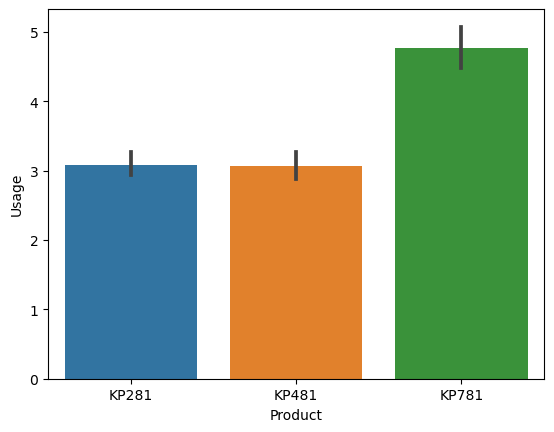

In [15]:
sns.barplot(df,x='Product',y='Usage')
# so we see if usage is 5 people more likely to buy the advance KP781

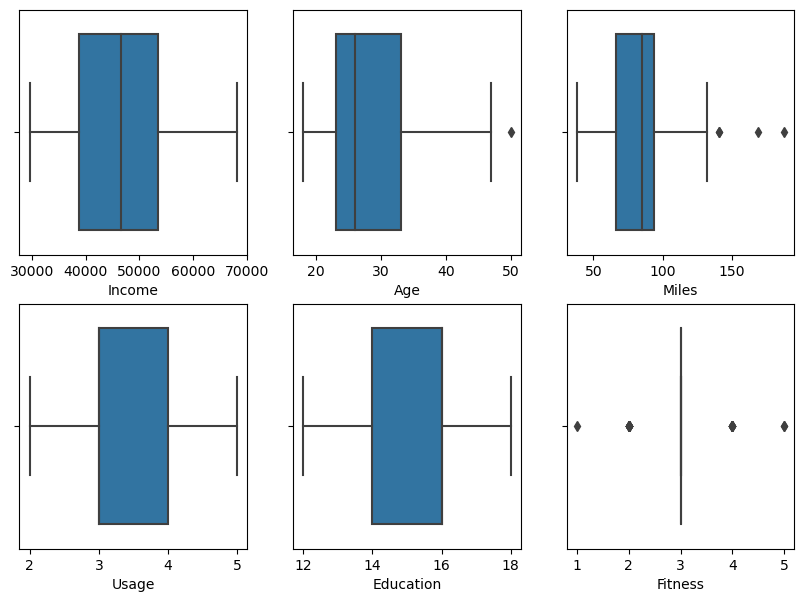

In [16]:
df_base=df.query('Product=="KP281"')
plt.figure(figsize=(10,7))
plt.subplot(2, 3, 1)
sns.boxplot(x=df_base['Income'])
plt.subplot(2, 3, 2)
sns.boxplot(x=df_base['Age'])
plt.subplot(2, 3, 3)
sns.boxplot(x=df_base['Miles'])
plt.subplot(2, 3, 4)
sns.boxplot(x=df_base['Usage'])
plt.subplot(2, 3, 5)
sns.boxplot(x=df_base['Education'])
plt.subplot(2, 3, 6)
sns.boxplot(x=df_base['Fitness'])
plt.show()

# we see that 50% customers for base KP281 are in the age range of 23 to 33.
# we see that 50% customers for base KP281 are in the income range of 38658.00000 53439.00000
# we see that 50% customers for base KP281 are in the Usage range of 3 to 4 days a week.
# we see that 50% customers for base KP281 have Fitness level 3.

In [17]:
df_base.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


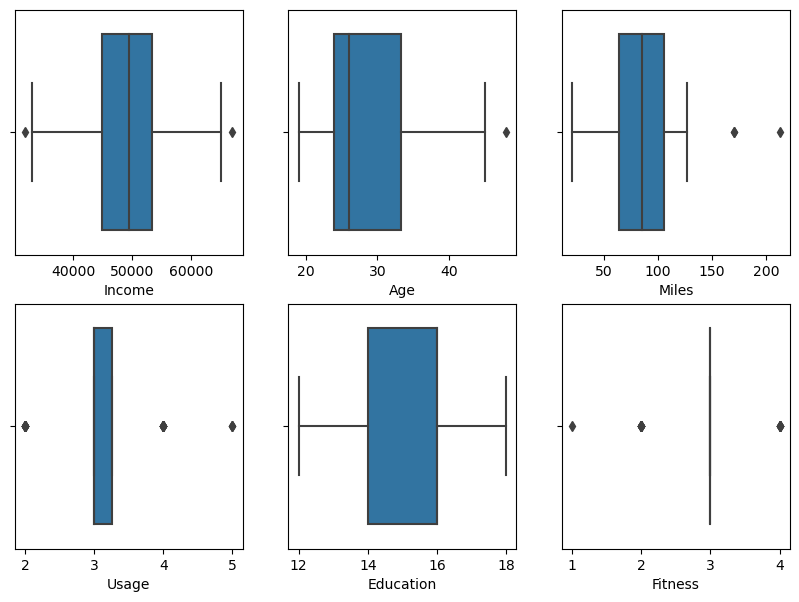

In [18]:
df_sigma=df.query('Product=="KP481"')
plt.figure(figsize=(10,7))
plt.subplot(2, 3, 1)
sns.boxplot(x=df_sigma['Income'])
plt.subplot(2, 3, 2)
sns.boxplot(x=df_sigma['Age'])
plt.subplot(2, 3, 3)
sns.boxplot(x=df_sigma['Miles'])
plt.subplot(2, 3, 4)
sns.boxplot(x=df_sigma['Usage'])
plt.subplot(2, 3, 5)
sns.boxplot(x=df_sigma['Education'])
plt.subplot(2, 3, 6)
sns.boxplot(x=df_sigma['Fitness'])
plt.show()

# if we take subset of original df for only KP781, only age has more outliers, Income has no outliers shows that people who has more income tend to buy the advance treamill.
# Miles has very less outlier it shows people who run more miles tend to buy advance KP781.
# In Education box plot we see median and 75% are same.
# we see that 50% customers for sigma KP481 are in the age range of 24 to 33.25.
# we see that 50% customers for sigma KP481 are in the income range of 44911.500000 53439.000000
# we see that 50% customers for sigma KP481 are in the Usage range of 3 to 3.25 days a week.
# we see that 50% customers for sigma KP481 have Fitness level 3.

In [19]:
df_sigma.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,28.900000,15.116667,3.066667,2.90000,48973.650000,87.933333
std,6.645248,1.222552,0.799717,0.62977,8653.989388,33.263135
min,19.000000,12.000000,2.000000,1.00000,31836.000000,21.000000
25%,24.000000,14.000000,3.000000,3.00000,44911.500000,64.000000
50%,26.000000,16.000000,3.000000,3.00000,49459.500000,85.000000
75%,33.250000,16.000000,3.250000,3.00000,53439.000000,106.000000
max,48.000000,18.000000,5.000000,4.00000,67083.000000,212.000000


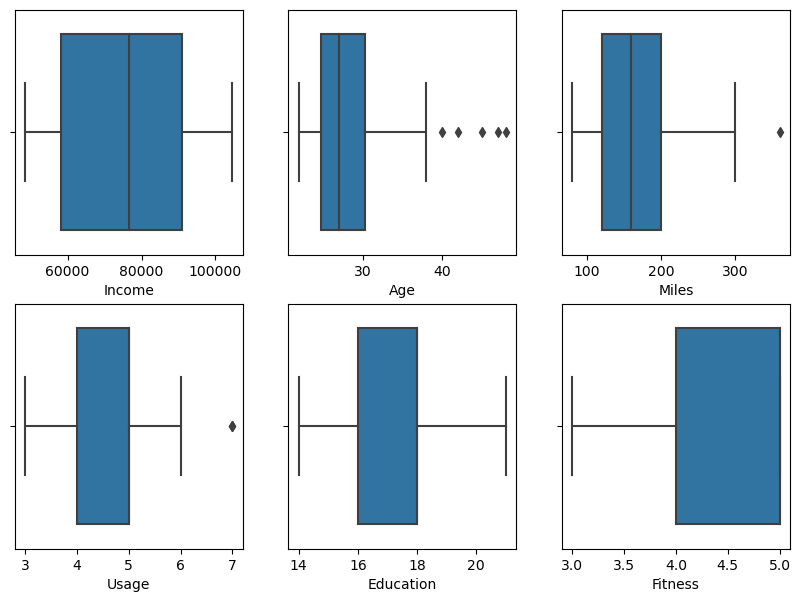

In [20]:
df_advance=df.query('Product=="KP781"')
plt.figure(figsize=(10,7))
plt.subplot(2, 3, 1)
sns.boxplot(x=df_advance['Income'])
plt.subplot(2, 3, 2)
sns.boxplot(x=df_advance['Age'])
plt.subplot(2, 3, 3)
sns.boxplot(x=df_advance['Miles'])
plt.subplot(2, 3, 4)
sns.boxplot(x=df_advance['Usage'])
plt.subplot(2, 3, 5)
sns.boxplot(x=df_advance['Education'])
plt.subplot(2, 3, 6)
sns.boxplot(x=df_advance['Fitness'])
plt.show()

# if we take subset of original df for only KP781, only age has more outliers, Income has no outliers shows that people who has more income tend to buy the advance treamill.
# Miles has very less outlier it shows people who run more miles tend to buy advance KP781.
# In Education box plot we see median and 75% are same.
# we see that 50% customers for advance KP781 are in the age range of 24.75 to 30.25.
# we see that 50% customers for advance KP781 are in the income range of 58204.75000 90886.00000
# we see that 50% customers for advance KP781 are in the Usage range of 4 to 5 days a week.
# we see that 50% customers for advance KP781 are in the Fitness range of 4 to 5.


In [21]:
df_advance.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000


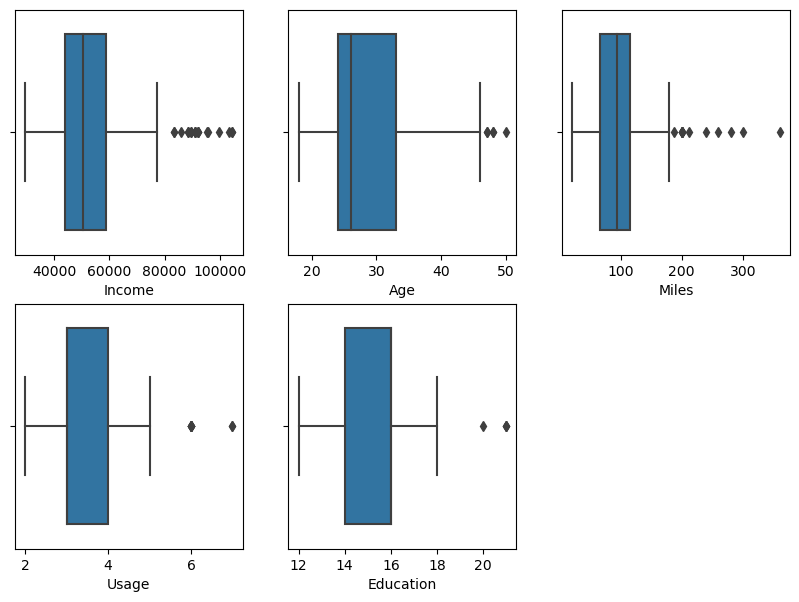

In [22]:
plt.figure(figsize=(10,7))
plt.subplot(2, 3, 1)
sns.boxplot(x=df['Income'])
plt.subplot(2, 3, 2)
sns.boxplot(x=df['Age'])
plt.subplot(2, 3, 3)
sns.boxplot(x=df['Miles'])
plt.subplot(2, 3, 4)
sns.boxplot(x=df['Usage'])
plt.subplot(2, 3, 5)
sns.boxplot(x=df['Education'])
plt.show()

# checking outliers

# 1) Age, Usage and Education have very few outliers while Income and Miles have more outliers.

In [23]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


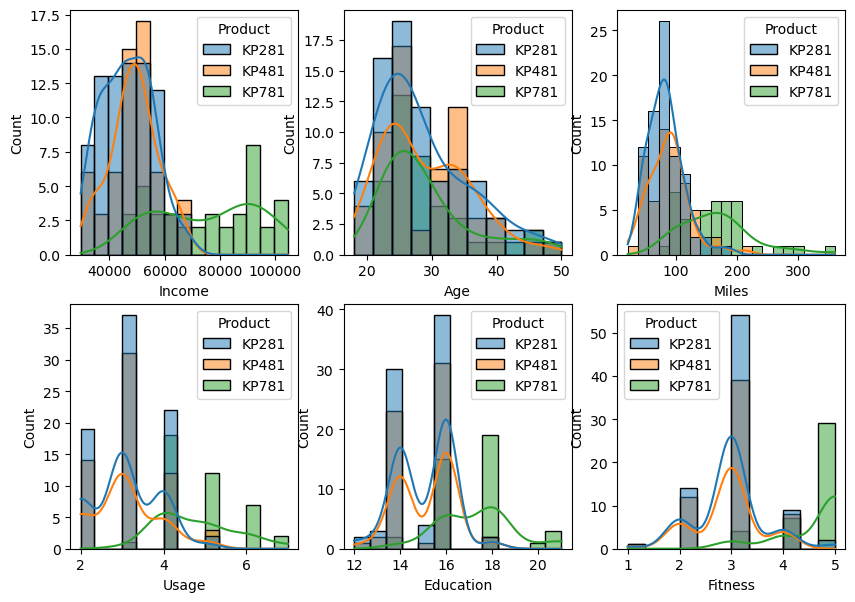

In [24]:
plt.figure(figsize=(10,7))
plt.subplot(2, 3, 1)
sns.histplot(x=df['Income'],kde=True,hue=df['Product'])
plt.subplot(2, 3, 2)
sns.histplot(x=df['Age'],kde=True,hue=df['Product'])
plt.subplot(2, 3, 3)
sns.histplot(x=df['Miles'],kde=True,hue=df['Product'])
plt.subplot(2, 3, 4)
sns.histplot(x=df['Usage'],kde=True,hue=df['Product'])
plt.subplot(2, 3, 5)
sns.histplot(x=df['Education'],kde=True,hue=df['Product'])
plt.subplot(2, 3, 6)
sns.histplot(x=df['Fitness'],kde=True,hue=df['Product'])
plt.show()


# we see Income, Age, Miles, Usage, Education, Fitness imapcts on product buying trends of people.

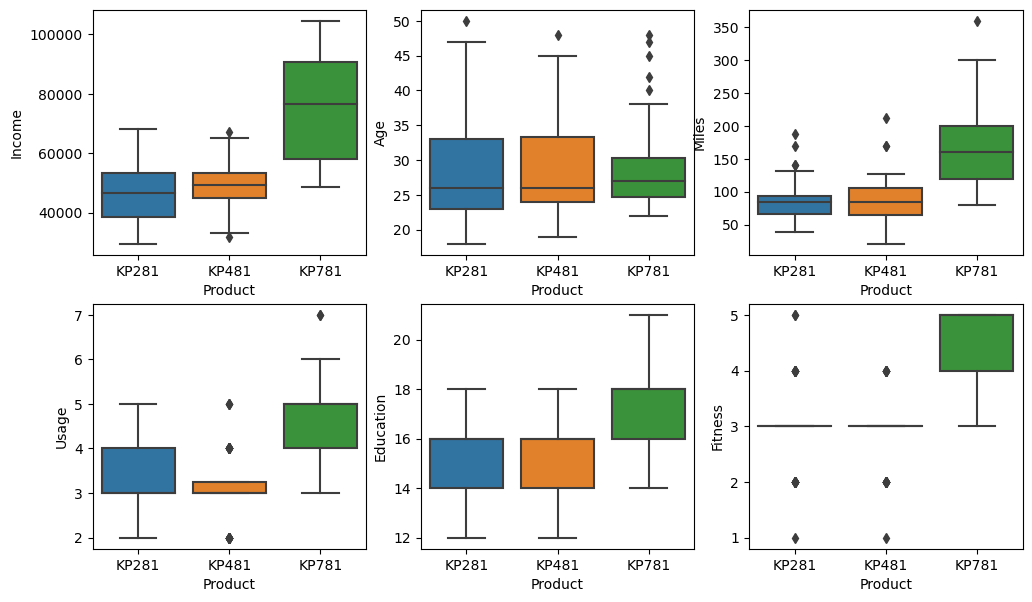

In [25]:
plt.figure(figsize=(12,7))
plt.subplot(2, 3, 1)
sns.boxplot(x=df['Product'],y=df['Income'])
plt.subplot(2, 3, 2)
sns.boxplot(x=df['Product'],y=df['Age'])
plt.subplot(2, 3, 3)
sns.boxplot(x=df['Product'],y=df['Miles'])
plt.subplot(2, 3, 4)
sns.boxplot(x=df['Product'],y=df['Usage'])
plt.subplot(2, 3, 5)
sns.boxplot(x=df['Product'],y=df['Education'])
plt.subplot(2, 3, 6)
sns.boxplot(x=df['Product'],y=df['Fitness'])
plt.show()

# from 1st box plot we see people with more income tend to buy the advance, this shows income has an impact on Product purchase.
# from 3rd we who runs or walks more tend to buy KP781 > KP481 > KP281
# from 4th we see usage also makes impact on buying the product.
# people who are educated more than 16 tend to buy advaace.

In [26]:
contingency_table_gender=pd.crosstab(df.Product,df.Gender)
print(contingency_table_gender)
contingency_table_gender.div(contingency_table_gender.sum(axis=0),axis=1).mul(100,axis=1)

# For KP281: Given that the customer is male, the probability of buying KP281 is 38.46%. Similarly, given that the customer is female, the probability of buying KP281 is 52.63%.

# For KP481: Given that the customer is male, the probability of buying KP481 is approximately 29.80%. Given that the customer is female, the probability of buying KP481 is approximately 38.15%.

# For KP781: Given that the customer is male, the probability of buying KP781 is approximately 31.73%. Given that the customer is female, the probability of buying KP781 is approximately 9.21%.

Gender   Female  Male
Product              
KP281        40    40
KP481        29    31
KP781         7    33


Gender,Female,Male
Product,,
KP281,52.631579,38.461538
KP481,38.157895,29.807692
KP781,9.210526,31.730769


<Axes: xlabel='Gender', ylabel='Product'>

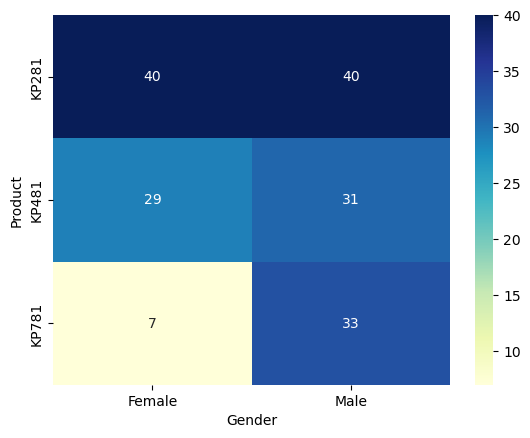

In [27]:
sns.heatmap(contingency_table_gender,annot=True, cmap='YlGnBu')

In [28]:
contingency_table_MaritalStatus=pd.crosstab(df.Product,df.MaritalStatus)
print(contingency_table_MaritalStatus)
contingency_table_MaritalStatus.div(contingency_table_MaritalStatus.sum(axis=0),axis=1).mul(100,axis=1)

# For KP281: Given that the customer is partnered, the probability of buying KP281 44.85%. Similarly, given that the customer is single, the probability of buying KP281 is 43.83%.

# For KP481: Given that the customer is partnered, the probability of buying KP481 is 33.64%. Given that the customer is single, the probability of buying KP481 is 32.87%.

# For KP781: Given that the customer is partnered, the probability of buying KP781 is 21.49%. Given that the customer is single, the probability of buying KP781 is 23.28%.

MaritalStatus  Partnered  Single
Product                         
KP281                 48      32
KP481                 36      24
KP781                 23      17


MaritalStatus,Partnered,Single
Product,,
KP281,44.859813,43.835616
KP481,33.644860,32.876712
KP781,21.495327,23.287671


<Axes: xlabel='MaritalStatus', ylabel='Product'>

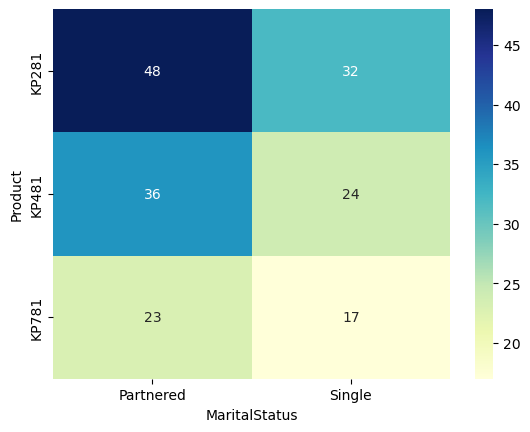

In [29]:
sns.heatmap(contingency_table_MaritalStatus,annot=True, cmap='YlGnBu')

In [30]:
contingency_table_fitness=pd.crosstab(df.Product,df.Fitness)
print(contingency_table_fitness)
contingency_table_fitness.div(contingency_table_fitness.sum(axis=0),axis=1).mul(100,axis=1)


# For KP281: Given that the customer has a fitness level of 1, the probability of buying KP281 is 50%. Given a fitness level of 2, the probability is 53.84. For fitness levels 3, 4, and 5, the probabilities are 55.67%, 37.50%, and 6.45%, respectively.

# For KP481: Given that the customer has a fitness level of 1, the probability of buying KP481 is 50%. Given a fitness level of 2, the probability is 46.15%. For fitness levels 3, 4, and 5, the probabilities are 40.20%, 33.33%, and 0.0, respectively.

# For KP781: Given that the customer has a fitness level of 1, the probability of buying KP781 is 0%. For fitness levels 2, 3, 4, and 5, the probabilities are 0%, 4.12% , 29.16%, 93.54%, respectively.

Fitness  1   2   3  4   5
Product                  
KP281    1  14  54  9   2
KP481    1  12  39  8   0
KP781    0   0   4  7  29


Fitness,1,2,3,4,5
Product,,,,,
KP281,50.0,53.846154,55.670103,37.500000,6.451613
KP481,50.0,46.153846,40.206186,33.333333,0.000000
KP781,0.0,0.000000,4.123711,29.166667,93.548387


<Axes: xlabel='Fitness', ylabel='Product'>

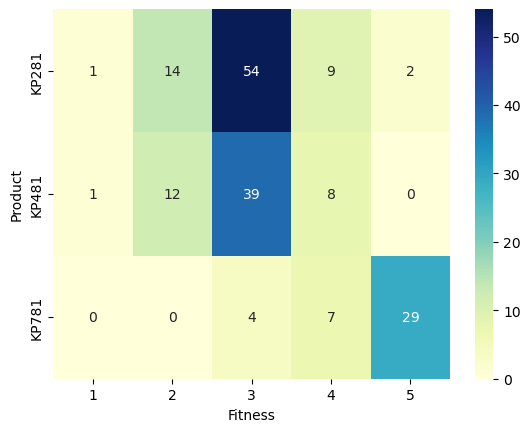

In [31]:
sns.heatmap(contingency_table_fitness,annot=True, cmap='YlGnBu')

In [32]:
contingency_table_usage=pd.crosstab(df.Product,df.Usage)
print(contingency_table_usage)
contingency_table_usage.div(contingency_table_usage.sum(axis=0),axis=1).mul(100,axis=1)


# For KP281: Given that the customer usage is 2 days a week, the probability of buying KP281 is 57.57%. For usage 3, 4, 5, 6, 7 days in a week the probabilities are 53.62%, 42.30% , 11.76%, 0% and 0% respectively.

# For KP481: Given that the customer usage is 2 days a week, the probability of buying KP481 is 42.42%. For usage 3, 4, 5, 6, 7 days in a week the probabilities are 44.92%, 23.07% , 17.64%, 0% and 0% respectively.

# For KP781: Given that the customer usage is 2 days a week, the probability of buying KP781 is 0%. For usage 3, 4, 5, 6, 7 days in a week the probabilities are 1.44%, 34.61% , 70.58%, 100% and 100% respectively.



# so from this the analysis comes out to be that if usage is more then 5 days a week, the customer is more likely to buy the advance treadmill.
# if the usage is 2,3,4 days a week more chances that the customer will buy KP281.

Usage     2   3   4   5  6  7
Product                      
KP281    19  37  22   2  0  0
KP481    14  31  12   3  0  0
KP781     0   1  18  12  7  2


Usage,2,3,4,5,6,7
Product,,,,,,
KP281,57.575758,53.623188,42.307692,11.764706,0.0,0.0
KP481,42.424242,44.927536,23.076923,17.647059,0.0,0.0
KP781,0.000000,1.449275,34.615385,70.588235,100.0,100.0


<Axes: xlabel='Usage', ylabel='Product'>

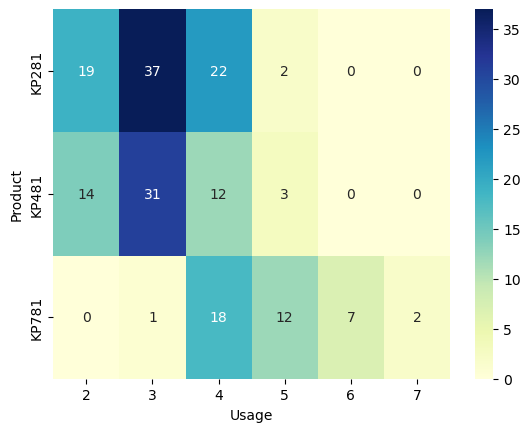

In [33]:
sns.heatmap(contingency_table_usage,annot=True, cmap='YlGnBu')

In [34]:
contingency_table_education=pd.crosstab(df.Product,df.Education)
print(contingency_table_education)
contingency_table_education.div(contingency_table_education.sum(axis=0),axis=1).mul(100,axis=1)


Education  12  13  14  15  16  18  20  21
Product                                  
KP281       2   3  30   4  39   2   0   0
KP481       1   2  23   1  31   2   0   0
KP781       0   0   2   0  15  19   1   3


Education,12,13,14,15,16,18,20,21
Product,,,,,,,,
KP281,66.666667,60.0,54.545455,80.0,45.882353,8.695652,0.0,0.0
KP481,33.333333,40.0,41.818182,20.0,36.470588,8.695652,0.0,0.0
KP781,0.000000,0.0,3.636364,0.0,17.647059,82.608696,100.0,100.0


In [35]:
# given the education we can find the probability from above.

<Axes: xlabel='Education', ylabel='Product'>

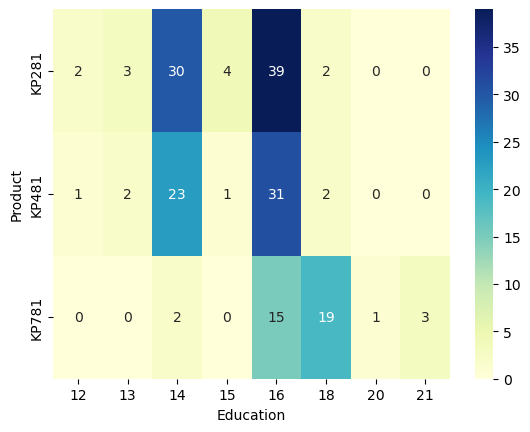

In [36]:
sns.heatmap(contingency_table_education,annot=True, cmap='YlGnBu')

In [37]:
pd.crosstab(df.Product,df.Miles)

Miles,21,38,42,47,53,56,64,66,74,75,...,170,180,188,200,212,240,260,280,300,360
Product,,,,,,,,,,,,,,,,,,,,,
KP281,0,3,0,9,0,6,0,10,0,10,...,0,0,1,0,0,0,0,0,0,0
KP481,1,0,4,0,7,0,6,0,3,0,...,2,0,0,0,1,0,0,0,0,0
KP781,0,0,0,0,0,0,0,0,0,0,...,1,6,0,6,0,1,1,1,1,1


In [38]:
contigency_table= pd.concat([contingency_table_usage,contingency_table_fitness],axis=1)
contigency_table

,2,3,4,5,6,7,1,2,3,4,5
Product,,,,,,,,,,,
KP281,19,37,22,2,0,0,1,14,54,9,2
KP481,14,31,12,3,0,0,1,12,39,8,0
KP781,0,1,18,12,7,2,0,0,4,7,29


In [39]:
df1=df_advance[['Product','Usage','Fitness']]
df1.describe()

,Usage,Fitness
count,40.000000,40.000000
mean,4.775000,4.625000
std,0.946993,0.667467
min,3.000000,3.000000
25%,4.000000,4.000000
50%,5.000000,5.000000
75%,5.000000,5.000000
max,7.000000,5.000000


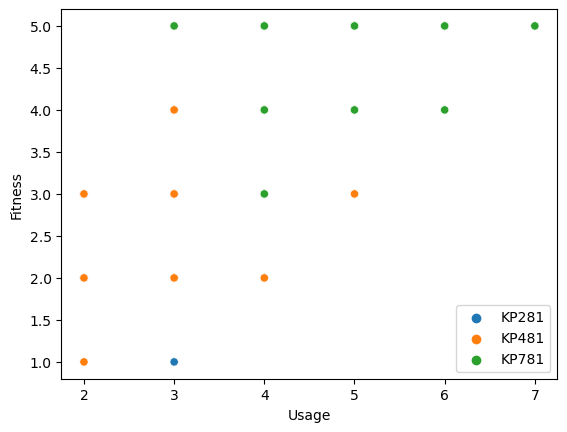

In [40]:
sns.scatterplot(x=df['Usage'],y=df['Fitness'],hue=df['Product'])
plt.legend(loc='lower right')
# so as per this scatter plot, we see a relation between Usage, Fitness and customers buying treadmill behaviour
# 1) Customer more likely to buy the advance KP781 treadmill if the fitness level = 5
# 2) Customer more likely to buy the advance KP781 treadmill if the usage is more than 5 days a week.
# 3) When usage is equal to or more than 4 days a week and fitness is equal to or more than 3, customer is more likely to buy KP781


In [41]:
contingency_table_usage_fitness = pd.crosstab([df.Product,df.Fitness],df.Usage)
print(contingency_table_usage_fitness)

Usage             2   3   4  5  6  7
Product Fitness                     
KP281   1         0   1   0  0  0  0
        2         9   4   1  0  0  0
        3        10  27  17  0  0  0
        4         0   5   3  1  0  0
        5         0   0   1  1  0  0
KP481   1         1   0   0  0  0  0
        2         5   6   1  0  0  0
        3         8  20   9  2  0  0
        4         0   5   2  1  0  0
KP781   3         0   0   4  0  0  0
        4         0   0   2  4  1  0
        5         0   1  12  8  6  2


<Axes: xlabel='Usage', ylabel='Product-Fitness'>

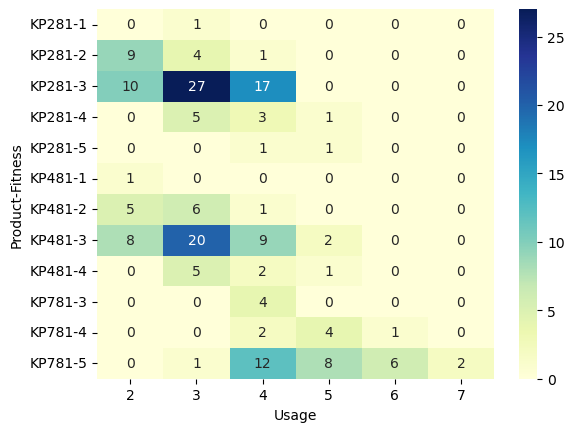

In [42]:
sns.heatmap(contingency_table_usage_fitness, annot=True, cmap='YlGnBu')
# This heat map shows the relation between usage, fitness and Product Count.

So, we can create customer profiles depending upon usage, fitness, income, by getting the usage, fitness and income stats of customer we can recommend customer a particular treadmill.

Recommndations-:
target audience for advance treadmill should be people like athletes or people with usage more than 4 days a week or people with fitness level more than 4 or people with income in the rage 58204.75000 90886.00000.

target audience for mid level treadmill KP481 should be be people like with in the income range of 44911.500000 53439.000000
,Usage range of 3 to 3.25 days a week and fitness level 3.

target audience for KP281 should be in age range of 23 to 33, income range of 38658.00000 53439.00000, Usage range of 3 to 4 days a week and Fitness level 3.

target audience on terms of people who run and walk more as we have seen trend of people who walk more thend to buy the advance version.

education also make impact on buying behaviour as seen above.

company to target more gender male and partnered people as we have seen trend of male and partnered buying more.